In [1]:
import astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.coordinates import search_around_sky
from astropy import units as u
from astropy.io import fits
from scipy.stats import binned_statistic
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gband = ascii.read('gband_NSAZTF.csv')
rband = ascii.read('rband_NSAZTF.csv')

nsa_fits = fits.open('nsa_v1_0_1.fits')
nsa_data = nsa_fits[1].data
nsa_ipac = ascii.read('fullNSA_ipac.txt')

In [3]:
ra_ztfG = np.array(gband['ra'])
de_ztfG = np.array(gband['dec'])
coord_ztfG = SkyCoord(ra_ztfG, de_ztfG, unit = 'deg')
magG = np.array(gband['medianmag'])
rmsG = np.array(gband['magrms'])

ra_ztfR = np.array(rband['ra'])
de_ztfR = np.array(rband['dec'])
coord_ztfR = SkyCoord(ra_ztfR, de_ztfR, unit = 'deg')
magR = np.array(rband['medianmag'])
rmsR = np.array(rband['magrms'])

petro_rad = np.array(nsa_data['ELPETRO_THETA'])

In [4]:
no_star = ascii.read('nsa_nostar.csv')
nostar_ra = np.array(no_star['RA'])
nostar_de = np.array(no_star['DEC'])
nostar_coord = SkyCoord(nostar_ra, nostar_de, unit = 'deg')

idx_ztfG, idx_nostarG, d2d, d3d = nostar_coord.search_around_sky(coord_ztfG, 1.0*u.arcsec)
idx_ztfR, idx_nostarR, d2d, d3d = nostar_coord.search_around_sky(coord_ztfR, 1.0*u.arcsec)

med_magG = magG[idx_ztfG]
mag_rmsG = rmsG[idx_ztfG]

med_magR = magR[idx_ztfR]
mag_rmsR = rmsR[idx_ztfR]

petro_radG = petro_rad[idx_nostarG]
petro_radR = petro_rad[idx_nostarR]

In [28]:
bin_numG = 15
fit_rangeG = (15.85, 20.35)

bin_numR = 15
fit_rangeR = (14.0, 20.0)

ypltG, xrawG, fooG = binned_statistic(med_magG, mag_rmsG, 'median', bins = bin_numG, range = fit_rangeG)
ypltR, xrawR, fooR = binned_statistic(med_magR, mag_rmsR, 'median', bins = bin_numR, range = fit_rangeR)

xwidthG = (xrawG[1] - xrawG[0])
xpltG = xrawG[1:] - xwidthG/2
xwidthR = (xrawR[1] - xrawR[0])
xpltR = xrawR[1:] - xwidthR/2

Gerr = binned_statistic(med_magG, mag_rmsG, 'std', bins = bin_numG, range = fit_rangeG)
Gerrors = Gerr[0]
Rerr = binned_statistic(med_magR, mag_rmsR, 'std', bins = bin_numR, range = fit_rangeR)
Rerrors = Rerr[0]

xpltG = xpltG[np.arange(0, len(xpltG)-1, 1)]
ypltG = ypltG[np.arange(0, len(ypltG)-1, 1)]
Gerrors = Gerrors[np.arange(0, len(Gerrors)-1, 1)]

xpltR = xpltR[np.arange(0, len(xpltR)-1, 1)]
ypltR = ypltR[np.arange(0, len(ypltR)-1, 1)]
Rerrors = Rerrors[np.arange(0, len(Rerrors)-1, 1)]

zG = np.polyfit(xpltG, ypltG, 4, w = 1/Gerrors)
pG = np.poly1d(zG)
testG = np.linspace(13, 23, 100)
zR = np.polyfit(xpltR, ypltR, 4, w = 1/Rerrors)
pR = np.poly1d(zR)
testR = np.linspace(13, 23, 100)

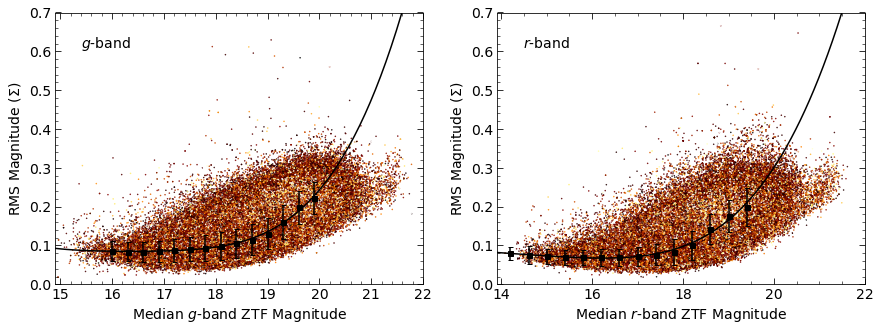

In [29]:
fig, (axG, axR) = plt.subplots(1, 2)
#axG.errorbar(med_magG, mag_rmsG, fmt = '.', markersize = 1, c = 'navy')
axG.scatter(med_magG, mag_rmsG, c = petro_radG, s = 1, marker = '.', cmap = 'afmhot', vmin = 2, vmax = 20)
axG.errorbar(xpltG, ypltG, yerr = Gerrors, fmt = 's', markersize = '5', c = 'k', zorder = 5, capsize = 2.5)
axG.errorbar(testG, pG(testG), fmt = '-', markersize = 5, c = 'k')
axG.set_xlabel(r'Median $g$-band ZTF Magnitude', fontsize = 14)
axG.set_xlim(14.9, 22)
axG.set_ylabel(r"RMS Magnitude ($\Sigma$)", fontsize = 14)
axG.set_ylim(0, 0.7)
axG.minorticks_on()
axG.tick_params(axis='both', which='both', direction='in', labelsize = 14)
axG.tick_params(axis='both', which='major', length=6)
axG.tick_params(axis='both', which='minor', length=3)
axG.xaxis.set_ticks_position('both')
axG.yaxis.set_ticks_position('both')
axG.text(0.07, 0.87, r'$g$-band', transform = axG.transAxes, fontsize = 14)

#axR.errorbar(med_magR, mag_rmsR, fmt = '.', markersize = 1, c = 'navy')
axR.scatter(med_magR, mag_rmsR, c = petro_radR, s = 1, marker = '.', cmap = 'afmhot', vmin = 2, vmax = 20)
axR.errorbar(xpltR, ypltR, yerr = Rerrors, fmt = 's', markersize = '5', c = 'k', zorder = 5, capsize = 2.5)
axR.errorbar(testR, pR(testR), fmt = '-', markersize = 5, c = 'k')
axR.set_xlabel(r'Median $r$-band ZTF Magnitude', fontsize = 14)
axR.set_xlim(13.9, 22)
axR.set_ylabel(r"RMS Magnitude ($\Sigma$)", fontsize = 14)
axR.set_ylim(0, 0.7)
axR.minorticks_on()
axR.tick_params(axis='both', which='both', direction='in', labelsize = 14)
axR.tick_params(axis='both', which='major', length=6)
axR.tick_params(axis='both', which='minor', length=3)
axR.xaxis.set_ticks_position('both')
axR.yaxis.set_ticks_position('both')
axR.text(0.07, 0.87, r'$r$-band', transform = axR.transAxes, fontsize = 14)

fig.subplots_adjust(right = 2.0)
fig.set_size_inches(6.0, 5.0)

In [30]:
print(pG)
print(pR)

           4          3         2
0.0007417 x - 0.0485 x + 1.191 x - 13.03 x + 53.6
           4           3          2
0.0002653 x - 0.01533 x + 0.3327 x - 3.221 x + 11.85


In [ ]:
from astroML.stats import binned_statistic_2d

fit_rangeG2 = [[15.85, 20.35],[0, 0.7]]
fit_rangeR2 = [[14.0, 20.0],[0, 0.7]]
ypltG2, xrawG2, fooG2 = binned_statistic_2d(med_magG, mag_rmsG, petro_radG, 'median', bins = bin_numG, range = fit_rangeG2)
ypltR2, xrawR2, fooR2 = binned_statistic_2d(med_magR, mag_rmsR, petro_radR, 'median', bins = bin_numR, range = fit_rangeR2)

cmap = plt.cm.jet
cmap.set_bad('w', 1.)
cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.)

fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.25, left=0.1, right=0.95,
                    bottom=0.07, top=0.95)

plt.subplot(121, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(ypltG2.T, origin='lower',
           extent=[xrawG2[0], xrawG2[-1], fooG2[0], fooG2[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xrawG2[-1], xrawG2[0])
plt.ylim(fooG2[-1], fooG2[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')
plt.ylabel(r'$\mathrm{log(g)}$')

cb = plt.colorbar(ticks=[0, 1, 2, 3],
                  format=r'$10^{%i}$', orientation='horizontal')
cb.set_label(r'$\mathrm{number\ in\ pixel}$')
plt.clim(0, 3)